## Contents
- 조건탐색
- 변수탐색
- 인코딩
- 시각적 탐색

In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
con1 = pd.concat([df1, df2], axis=0, ignore_index=True)
con1
con2 = pd.concat([df1, df2], axis=1)
con2

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind'] = [1,2,3,4]
df1

df2['ind'] = [1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# merge() 를 이용한 결합
pd.merge(df1, df2, on='ind', how='outer') # outer : 합집합
#pd.merge(df1, df2, on='ind') # default(inner) : 교집합

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1.0,2.0,3.0,4.0,5.0,1,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,2,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,3,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,4,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,5,27,28,29,30


In [ ]:
df1 = df1.drop('ind', axis=1)
df2 = df2.drop('ind', axis=1)
df1

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합(default는 교집합)
# df1.join(df2, lsuffix='_1',rsuffix='_2')
# lsuffix, rsuffix : 구분하기 위해 원래 컬럼명+구분자의 의미
df1.join(df2, lsuffix = '_1', rsuffix = '_2', how='inner')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2, lsuffix = '_1', rsuffix = '_2', how='outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
import pandas as pd

# 주식 데이터를 가져와서 데이터프레임 만들기
filepath1 = '/content/drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/stock valuation.xlsx'
df1 = pd.read_excel(filepath1, engine='openpyxl', index_col = 'id')
df2 = pd.read_excel(filepath2, engine='openpyxl', index_col = 'id')

print(df1, '\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [ ]:
# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how='left'옵션이 기본 적용
df3 = df1.join(df2, how='right')
df3

df4 = df1.join(df2, how='inner')
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# Q. df4에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000보다 적거나
# stock_name이 이마트인 데이터를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력하세요
# 단, '<'와 '=='를 반드시 사용해야함

df4.drop('name', axis=1, inplace=True)

df5 = df4[ (df4['eps'] < 3000) | (df4['stock_name'] == '이마트') ]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np

data = np.arange(20).reshape(4,5)

df = pd.DataFrame(data, columns = ['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1 = df.copy()
print(df1, '\n')
df1.drop(df1.index[0])

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
idx = df1[df1.a > 10].index
print(idx, '\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
df1.index[0]
df1.drop(0)

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
cond1 = df.a > 10
cond2 = df.b == 16
cond3 = df.e > 15
df[cond1 & cond2 & cond3]
df[cond1 | cond2 | cond3] # 파이프

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
df[cond1][['a','b']]

,a,b
3,15,16


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf2 = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 컬럼 이름 변경
tdf.rename(columns={'sex':'gender', 'fare':'ticket'}, inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 컬럼 값 변경
tdf1 = tdf.copy
#tdf1.gender.replace({'female':1, 'male':0}, inplace=True) # 원본 반영시
df1 = tdf[['gender']].replace(['female','male'],[1,0]) # 원본 반영X
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
# 칼럼 대문자 변경
tdf.rename(str.upper, axis='columns', inplace=True)
tdf.head()

# 칼럼 소문자 변경
tdf.rename(str.lower, axis='columns', inplace=True)
tdf.head()

# 앞글자만 대문자
tdf.rename(str.capitalize, axis='columns', inplace=True)
tdf.head()

,Survived,Pclass,Gender,Age,Sibsp,Parch,Ticket,Embarked,Class,Who,Adult_male,Deck,Embark_town,Alive,Alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2 = df.copy()

In [ ]:
# 컬럼 순서 변경

columns_customed = ['pclass', 'sex', 'age', 'survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
tdf1 = tdf[['age', 'ticket']].head()
tdf1

KeyError: "None of [Index(['age', 'ticket'], dtype='object')] are in the [columns]"

In [ ]:
tdf1.info()

In [ ]:
tdf1 = tdf1.astype({'age':'int', 'ticket':'int'})
tdf1.info()

In [ ]:
# 컬럼의 값 구성 체크
tdf.age.value_counts()

# 컬럼의 고유 구성 요소
tdf.age.unique()
len(tdf.age.unique())

In [ ]:
# 컬럼 범주화 ( pd.cut() )
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels=category)
tdf

## 인코딩 : 알고리즘에 데이터를 적용할 때에는 무조건 숫자형으로 변환해야한다

범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 예제 데이터
data = {'color':['red','blue', 'green', 'blue', 'red']}
df = pd.DataFrame(data)

# label Encoding 적용
label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df['color'])

df

,color,color_encoded
0,red,2
1,blue,0
2,green,1
3,blue,0
4,red,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 예제 데이터
data = {'color':['red','blue', 'green', 'blue', 'red']}
df = pd.DataFrame(data)

# One-Hot Encoding 적용
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(df[['color']])

# 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['color']))

# 원래 데이터프레임에 추가
df = pd.concat([df, encoded_df], axis=1)
df

# 결국 label이나 onehot은 각자의 장단점이 있음

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,blue,1.0,0.0,0.0
4,red,0.0,0.0,1.0


In [ ]:
tdf.gender.value_counts()

# 이 경우 레이블인코딩 하는게 좋다. 0과 1만 있으니..


gender
male      577
female    314
Name: count, dtype: int64

In [ ]:
le = LabelEncoder()
features = ['gender', 'age']
for ft in features:
  tdf[ft] = le.fit_transform(tdf[ft])

tdf.head()
tdf.age.unique() # 모두 정수형으로 바뀌었다.

array([28, 51, 34, 47, 88, 69,  6, 35, 18,  8, 74, 25, 52, 70, 41, 45, 20,
       36, 12, 24, 53, 82, 56, 27, 23,  7, 11, 64, 38, 81, 37,  9, 15, 59,
       22, 42, 21, 33,  3, 39, 44, 29, 31, 61, 75, 85, 50, 62, 19, 84, 43,
       16, 13, 49, 66, 71, 54, 58,  5, 77, 72, 65, 48, 60, 26, 78, 55, 67,
       79, 30,  4, 57, 76, 14, 80, 17, 63,  2, 68, 73, 87, 83, 32, 10,  1,
       40,  0, 46, 86])

In [ ]:
tdf2 = tdf[['gender', 'class']]

In [ ]:
import pandas as pd
pd.get_dummies(tdf2).head()

,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


## 시각화

Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

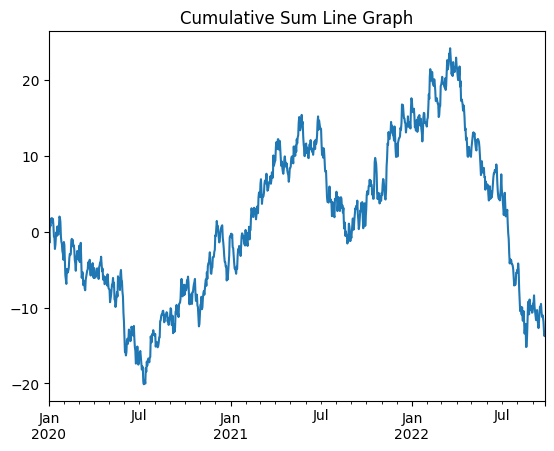

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
# randn (rand nomal) : 표준정규분포. 평균 0 표준편차 1 가우시안 표준정규분포 난수 매트릭스
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()

# 라인 그래프
ts.plot()
plt.title('Cumulative Sum Line Graph')
plt.show()

In [ ]:
# 데이터 생성
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts1 = ts.cumsum()

df = pd.DataFrame({'value':ts, 'cum':ts1})
df.head()

,value,cum
2020-01-01,1.389870,1.389870
2020-01-02,1.051378,2.441247
2020-01-03,0.059225,2.500472
2020-01-04,-1.141943,1.358530
2020-01-05,-0.195000,1.163529


In [ ]:
num = np.random.randn(10000000000000)

# 샘플이 적으면 적을수록 오차가 커지고 샘플(데이터)이 많으면 많을수록 오차가 적어질수밖에없다.

mean_val = num.mean()
std_dev = num.std()
print(mean_val, std_dev)

              A         B
one    0.041453  0.394568
two    0.274803  0.204558
three  0.459458  0.284086
four   0.170716  0.079512
five   0.605768  0.057901 



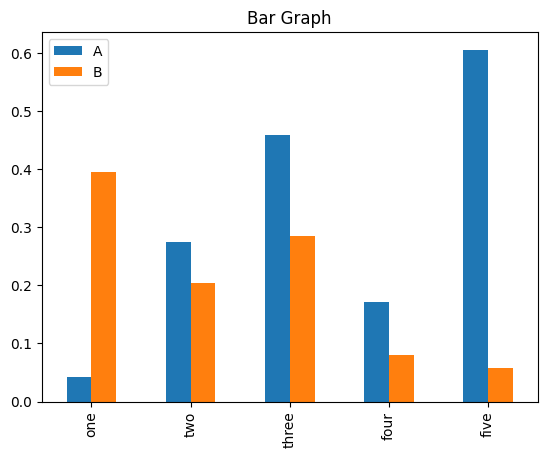

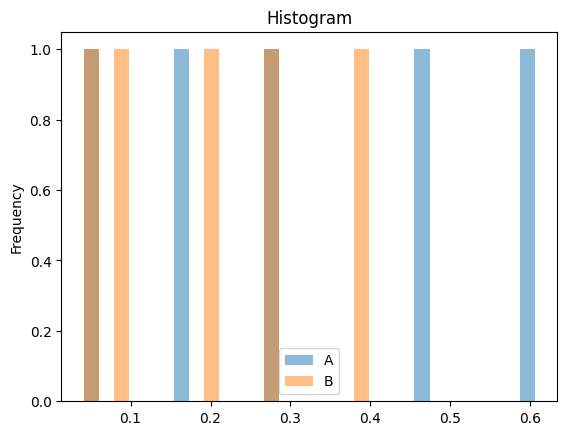

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
  'A':np.random.rand(5),
  'B':np.random.rand(5)
}, index = ['one','two','three','four','five'])

print(df,'\n')

# 막대그래프
df.plot.bar()
plt.title('Bar Graph')
plt.show() # 콜랩에선 자동지원

            A         B
0   -1.086411 -0.640817
1    0.696703 -1.530126
2    0.099504  0.442090
3    0.400367 -0.469046
4   -2.260491  0.860903
..        ...       ...
995  0.275100  1.820124
996  1.847094  0.461784
997  0.005729 -0.771153
998 -1.221323  1.020245
999 -1.832164  0.548779

[1000 rows x 2 columns] 



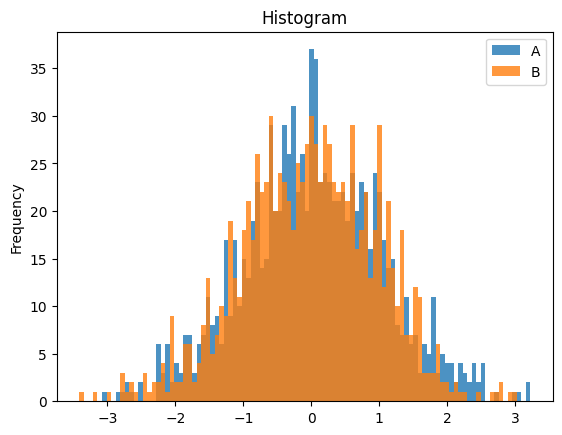

In [ ]:
df = pd.DataFrame({
  'A':np.random.randn(1000),
  'B':np.random.randn(1000)
})

print(df,'\n')

# 히스토그램
df.plot.hist(alpha=0.8, bins=100) # alpha : 투명도, bins : 구간
plt.title('Histogram')
plt.show()

            A         B
0    0.378942  0.251757
1    0.256861 -1.500445
2    0.766968 -0.572590
3   -0.460496  0.298153
4   -1.153149 -0.767339
..        ...       ...
995  0.114289  1.188519
996 -0.669187 -0.493542
997 -0.099596  0.792813
998  1.083410 -0.401443
999 -0.016782 -0.029516

[1000 rows x 2 columns] 



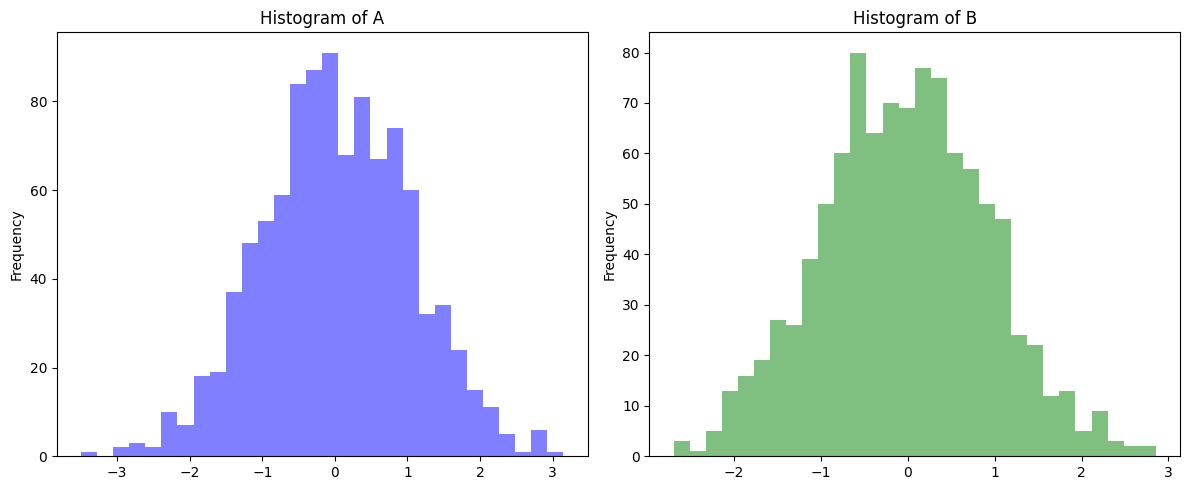

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
  'A':np.random.randn(1000),
  'B':np.random.randn(1000)
})

print(df,'\n')

# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두 번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

          A         B         C         D         E
0  0.487951  0.524918  0.345230  0.275336  0.446630
1  0.932399  0.798231  0.453774  0.659608  0.145329
2  0.114738  0.580005  0.115640  0.495815  0.626308
3  0.766756  0.656786  0.253406  0.101188  0.254296
4  0.657713  0.364208  0.604307  0.236801  0.019571
5  0.133997  0.236865  0.519874  0.957990  0.295756
6  0.629056  0.344965  0.701583  0.225040  0.702870
7  0.684478  0.779354  0.084186  0.674506  0.627444
8  0.781537  0.152984  0.460652  0.345628  0.340893
9  0.460510  0.244350  0.144884  0.278816  0.181302 

               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.564914   0.468266   0.368354   0.425073   0.364040
std     0.269754   0.232381   0.214422   0.265981   0.230199
min     0.114738   0.152984   0.084186   0.101188   0.019571
25%     0.467371   0.269503   0.172014   0.246434   0.199551
50%     0.643385   0.444563   0.399502   0.312222   0.318325

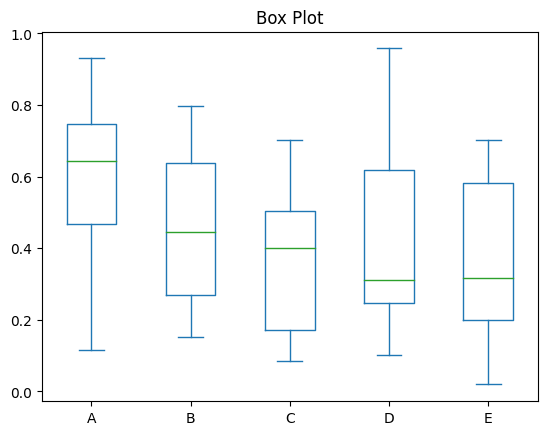

In [5]:
# 박스 플롯
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0~1사이의 실수를 10행 5열로 생성
df = pd.DataFrame(np.random.rand(10,5), columns=['A','B','C','D','E'])
print(df,'\n')
print(df.describe(), '\n')

df.plot.box()
plt.title('Box Plot')
plt.show()

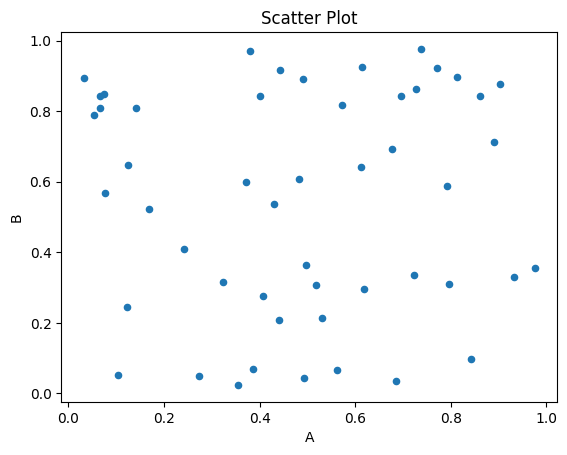

In [7]:
# 산점도
df = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])

# 컬럼 두개를 선택하여 A와 B의 좌표를 찍어본다.
# 양과 음의 상관관계를 알 수 있다.
# ex) A가 올라가면 B도 함께 올라간다 : 양의 상관관계
# A가 떨어지면 B도 함께 떨어진다 : 음의 상관관계
df.plot.scatter(x='A', y='B')
plt.title('Scatter Plot')
plt.show()

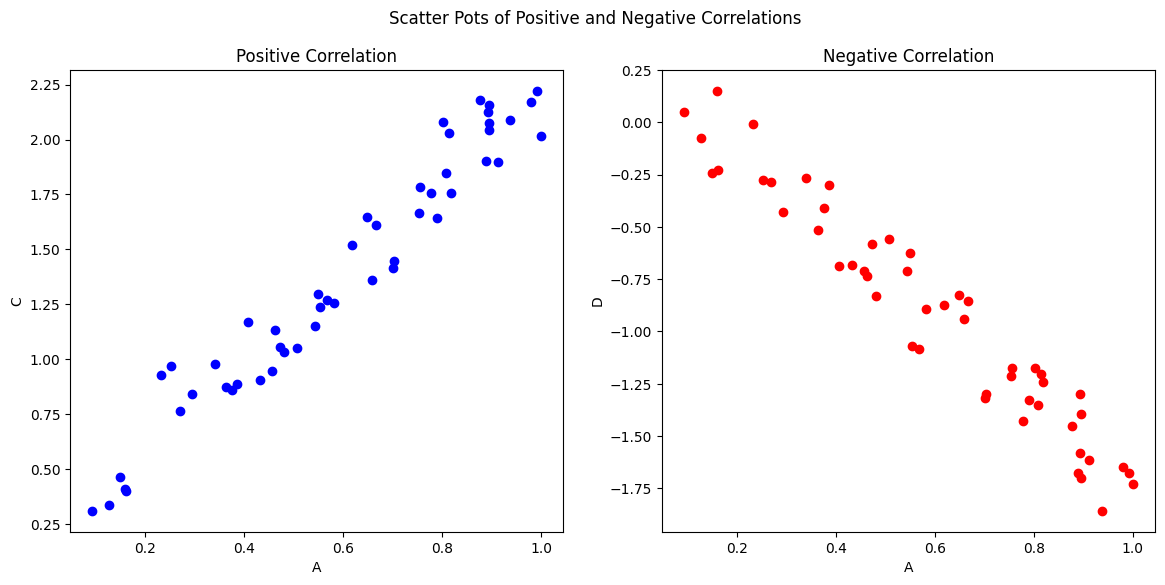

In [11]:
df = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])

# 양의 상관관계
df['C'] = (df['A'] * 2) + (np.random.rand(50) * 0.5)

# 음의 상관관계
df['D'] = (-df['A'] * 2) + (np.random.rand(50) * 0.5)

fig, axs = plt.subplots(1,2,figsize=(14,6))

# 양의 상관관계
axs[0].scatter(df['A'], df['C'], color='blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

# 음의 상관관계
axs[1].scatter(df['A'], df['D'], color='red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_ylabel('D')

plt.suptitle('Scatter Pots of Positive and Negative Correlations')
plt.show()

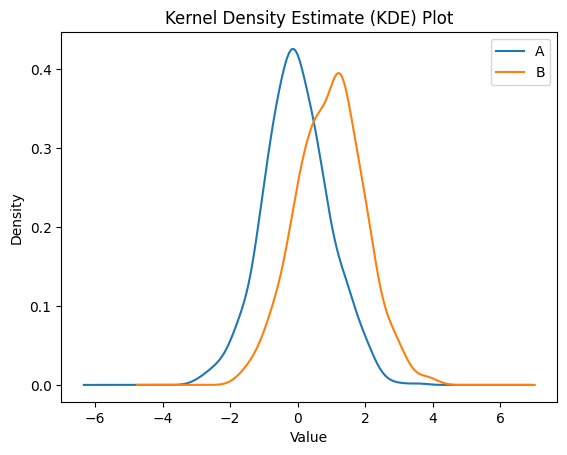

In [13]:
# 커널 밀도 추정(KDE, Kernel Density Estimate) 그래프 : 데이터의 분포를 부드럽게 나타내는 그래프

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터생성
data = pd.DataFrame({
  'A':np.random.randn(1000),
  'B':np.random.randn(1000)+1
})

# KDE 그래프
data.A.plot.kde(label='A')
data.B.plot.kde(label='B')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend() # 범례
plt.show()

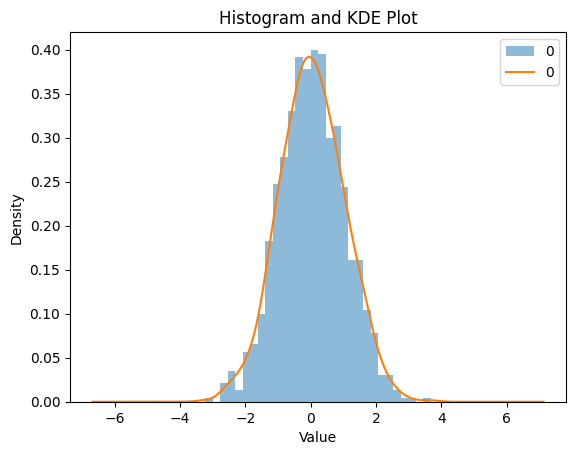

In [14]:
# Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
data = pd.DataFrame(np.random.randn(1000))

# 히스토그램과 KDE 같이 그리기
ax = data.plot.hist(bins=30, alpha=0.5, density=True, label='Histogram') #히스토그램
data.plot.kde(ax=ax, label='KDE') # kde의 데이터를 ax로 주었음.
plt.title('Histogram and KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

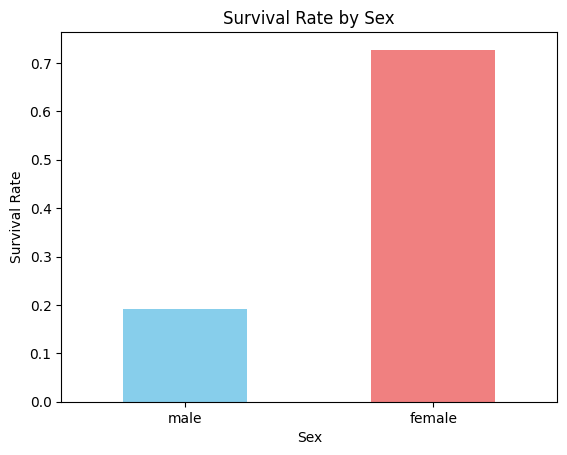

In [47]:
# Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터프레임 읽기
file_path = 'drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/titanic3.csv'
df = pd.read_csv(file_path)

df1 = df.groupby('sex').survived.mean().sort_values() # default:올림차순

df1.plot(kind='bar', color=['skyblue','lightcoral'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0) # label 표기 회전율
plt.show()

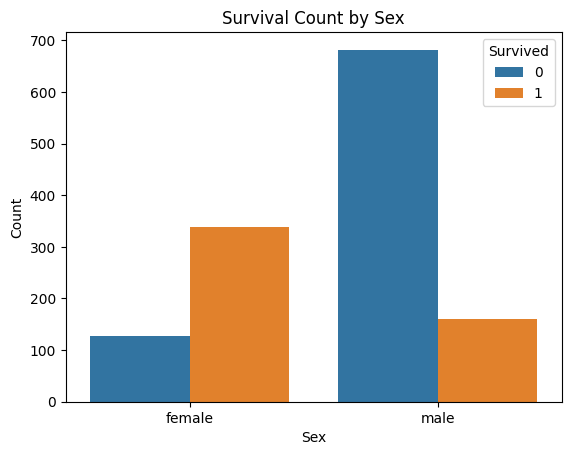

In [56]:
# seaborn으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객(생존/사망)수 관계 시각화
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

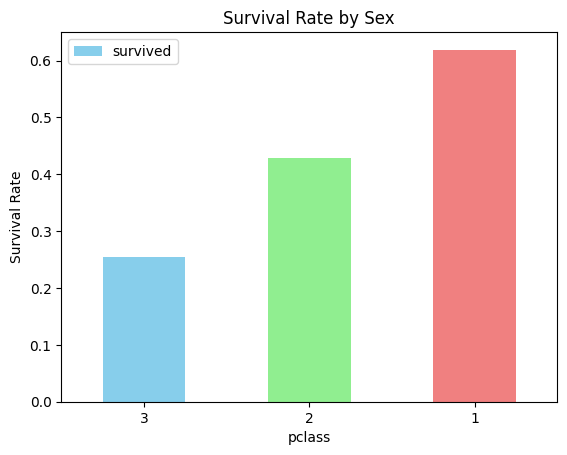

In [61]:
# Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

df1 = df.groupby('pclass').survived.mean().sort_values()

df1.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Survival Rate by Sex')
plt.xlabel('pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0) # label 표기 회전율
plt.legend()
plt.show()

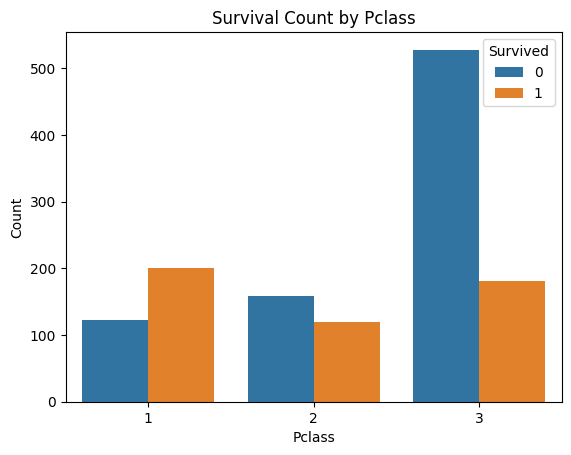

In [63]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

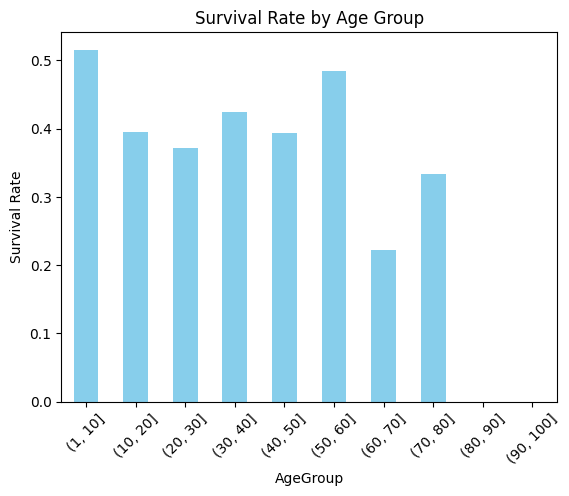

In [70]:
# Q. 나이와 생존율 관계를 시각화하여 출력하세요.
df['age_group'] = pd.cut(df['age'], bins = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90,100])

df1 = df.groupby('age_group').survived.mean()

df1.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('AgeGroup')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45) # label 표기 회전율
plt.show()

In [78]:
df[df.survived == 0].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_family,age_group
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,"(1, 10]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,"(20, 30]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,"(20, 30]"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,"(30, 40]"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0,"(70, 80]"


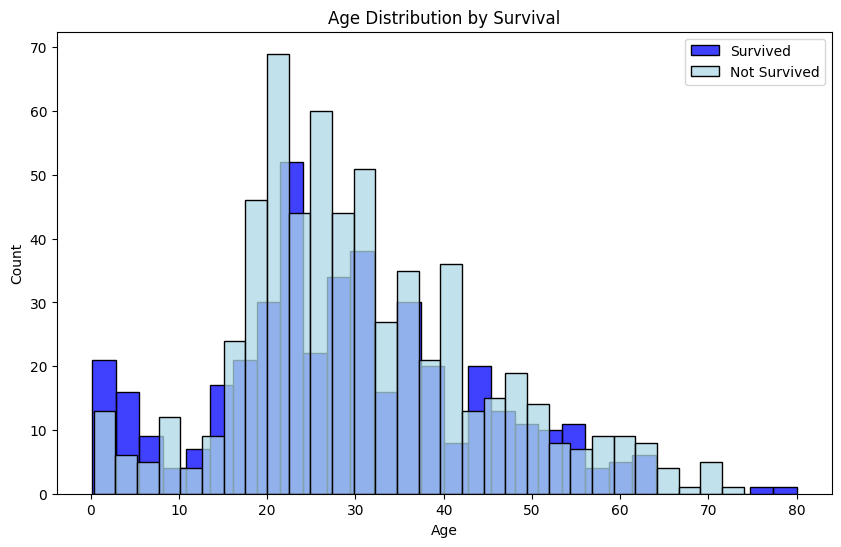

In [79]:
# 나이와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df.survived == 1].age, bins=30, kde=False, color='blue', label='Survived')
sns.histplot(df[df.survived == 0].age, bins=30, kde=False, color='lightblue', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

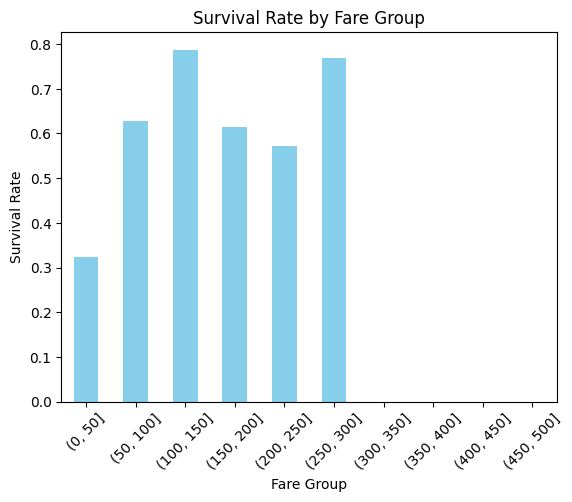

In [80]:
# Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.
# (0,10] : 0 초과 10 이하
df['fare_group'] = pd.cut(df['fare'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

df1 = df.groupby('fare_group').survived.mean()

df1.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45) # label 표기 회전율
plt.show()

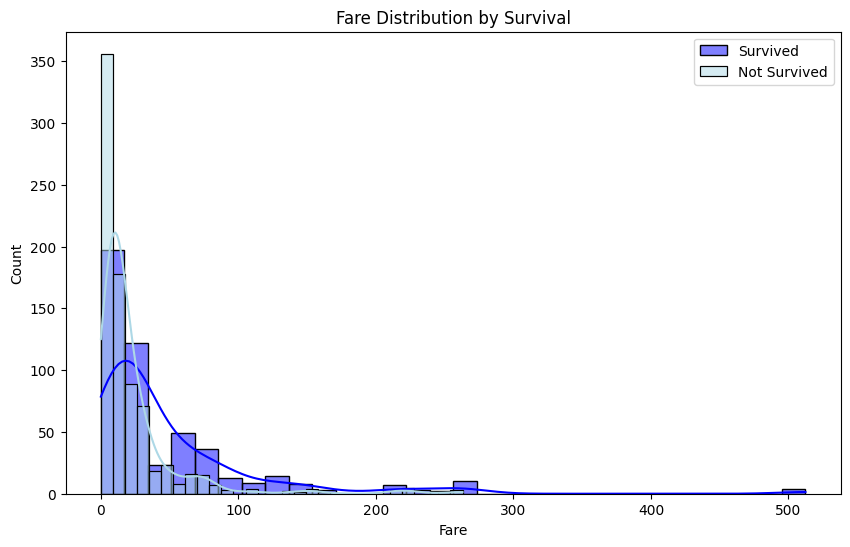

In [83]:
# 요금과 생존, 사망자수 관계 시각화
# 나이와 생존, 사망자수 관계 시각화
plt.figure(figsize=(10,6))
sns.histplot(df[df.survived == 1].fare, bins=30, kde=True, color='blue', label='Survived')
sns.histplot(df[df.survived == 0].fare, bins=30, kde=True, color='lightblue', label='Not Survived')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

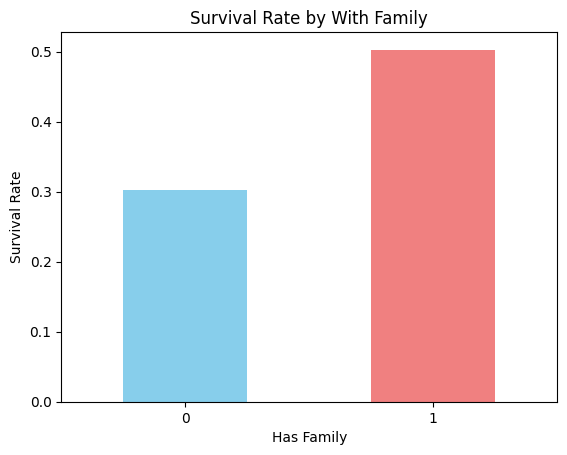

In [88]:
# Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.
df['with_family'] = (df.sibsp + df.parch > 0).astype(int)
df1 = df.groupby('with_family').survived.mean()

df1.plot(kind='bar', color=['skyblue','lightcoral'])
plt.title('Survival Rate by With Family')
plt.xlabel('Has Family')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0) # label 표기 회전율
plt.show()

with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



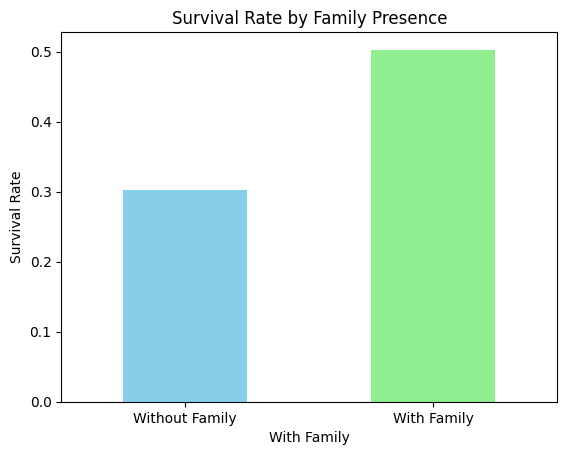

In [87]:
# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)

# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

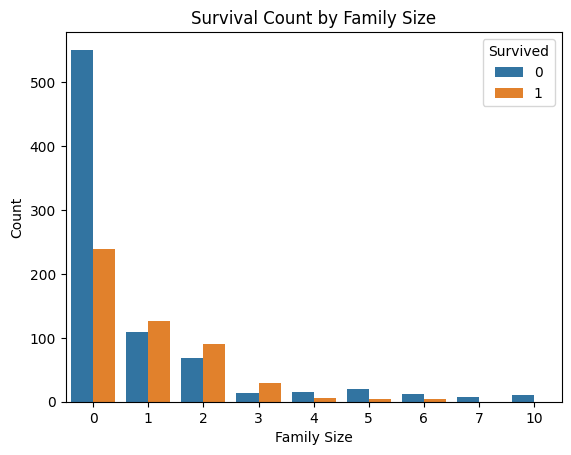

In [89]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()